In [ ]:
#mkdir A5

In [ ]:
cd A5

/content/A5


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
x =df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


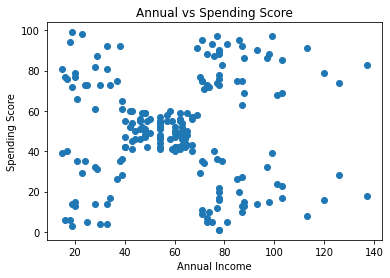

In [ ]:
plt.title('Annual vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

In [ ]:
km = KMeans(n_clusters=3)
km.fit_predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
xpred = km.predict(x)

In [ ]:
km.inertia_ #sse value

106348.37306211122

In [ ]:
sse = []
for k in range(1,16):
  km = KMeans(n_clusters=k)
  km.fit_predict(x)
  sse.append(km.inertia_)

In [ ]:
print(sse)

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30259.65720728547, 25030.38309852032, 21996.523372372307, 19646.482018947238, 18248.984776334775, 16320.094588744585, 14321.881821120054, 12938.609665334663, 11722.82794451925]


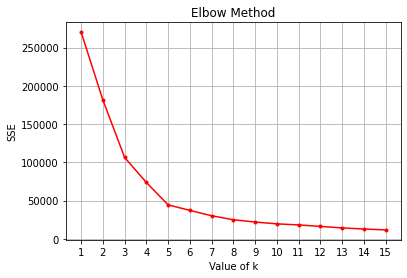

In [ ]:
plt.title('Elbow Method')
plt.xlabel('Value of k')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse, marker='.',color='red')

In [ ]:
silh = []
for k in range(2,16):
  km = KMeans(n_clusters=k)
  label = km.fit_predict(x)
  score = silhouette_score(x,label)
  silh.append(score)

<BarContainer object of 14 artists>

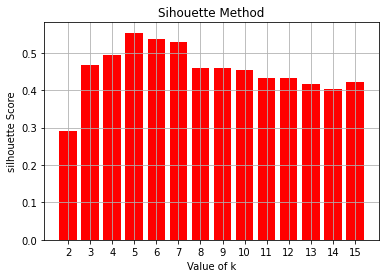

In [ ]:
plt.title('Sihouette Method')
plt.xlabel('Value of k')
plt.ylabel('silhouette Score')
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16),silh,color='red')

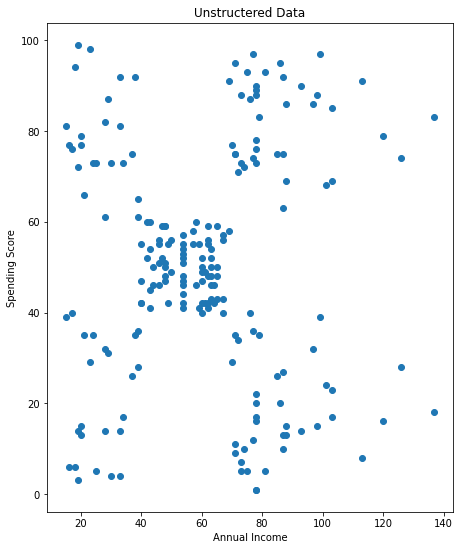

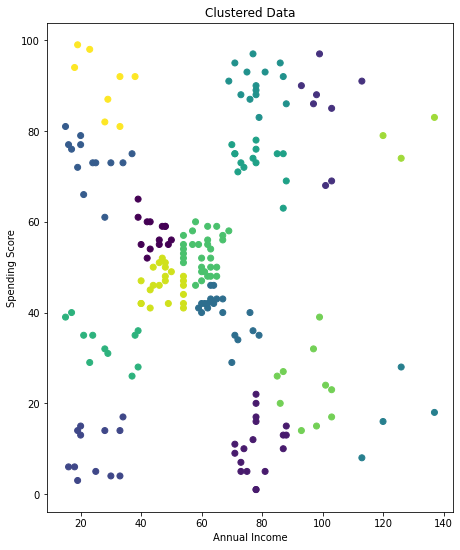

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unstructered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)']) #actual plot

plt.figure(figsize=(16,9))
plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=xpred) #predicted plot

In [ ]:
 cent = km.cluster_centers_

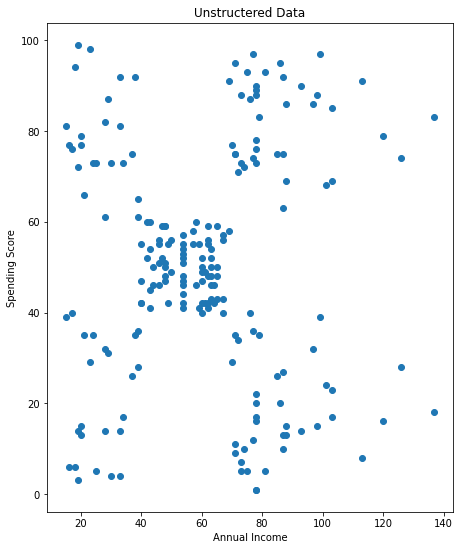

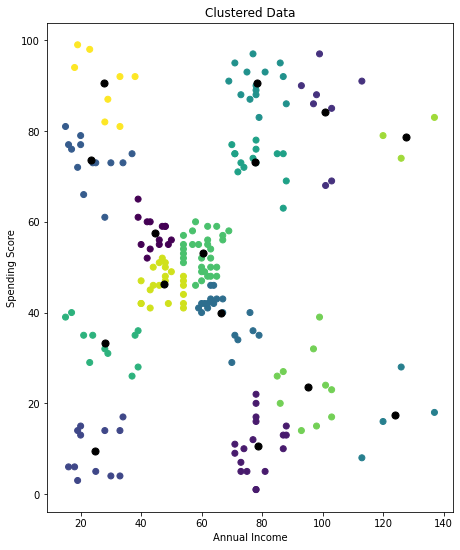

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unstructered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

plt.figure(figsize=(16,9))
plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=xpred)
plt.scatter(cent[:,0],cent[:,1], s=50, color='k')

In [ ]:
km.inertia_

11718.686082776872

In [ ]:
km.labels_

array([ 9,  4,  3,  4,  9,  4,  3, 14,  3,  4,  3, 14,  3,  4,  3,  4,  9,
        4,  9, 14,  9,  4,  3,  4,  3, 14,  9,  4,  9, 14,  3,  4,  3, 14,
        3, 14,  3,  4,  9,  4,  9, 14,  9,  0,  9,  0,  0, 13, 13, 13,  0,
        0,  0,  0, 13, 13, 13, 13, 13, 13,  0,  0, 13,  0, 13,  0, 13, 13,
        0, 13,  0, 13, 13,  0, 13, 10, 10, 13, 10, 13, 10, 10, 13, 13, 10,
       13, 10, 10, 10, 10, 10,  5, 10,  5,  5, 10, 10, 10,  5, 10,  5, 10,
       10, 10, 10,  5, 10,  5,  5, 10, 10, 10,  5,  5, 10, 10,  5, 10,  5,
       10, 10,  5, 10,  7,  5,  8,  5,  7,  1,  8,  1,  8,  5,  8,  1,  7,
        1,  8,  1,  8,  1,  7,  5,  7,  1,  7,  5,  8,  1,  7,  1,  7,  1,
        8,  1,  7,  1,  8,  1,  8,  5,  7,  1,  7, 11,  8, 11,  7, 11,  8,
        1,  8,  1,  7,  1,  7,  1,  8, 11,  2, 11,  2, 11,  2, 11,  2, 11,
        2, 11,  2, 11,  2,  6,  2,  6, 12,  6, 12,  6, 12], dtype=int32)

In [ ]:
df[label==4]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
9,10,Female,30,19,72
13,14,Female,24,20,77
15,16,Male,22,20,79
17,18,Male,20,21,66
21,22,Male,25,24,73
23,24,Male,31,25,73
27,28,Male,35,28,61


In [ ]:
agl = AgglomerativeClustering(n_clusters=5)
agl.fit(x)

AgglomerativeClustering(n_clusters=5)

In [ ]:
from sklearn.neighbors import NearestCentroid
clusterer = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_predict = clusterer.fit_predict(x)
#...
clf = NearestCentroid()
clf.fit(x, y_predict)
print(clf.centroids_)

[[89.40625    15.59375   ]
 [55.81176471 49.12941176]
 [86.53846154 82.12820513]
 [25.0952381  80.04761905]
 [26.30434783 20.91304348]]


In [ ]:
cent2 = clf.centroids_

In [ ]:
xpred2 = agl.fit_predict(x)

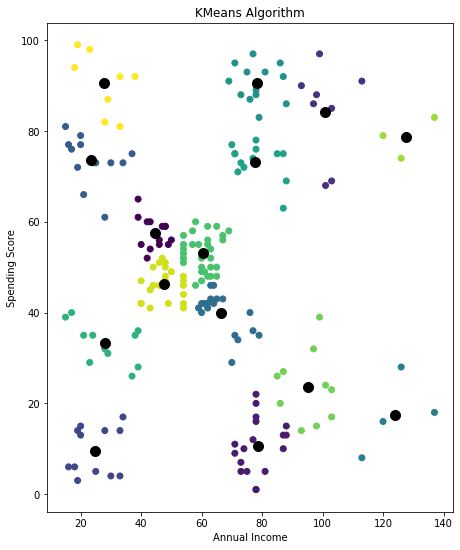

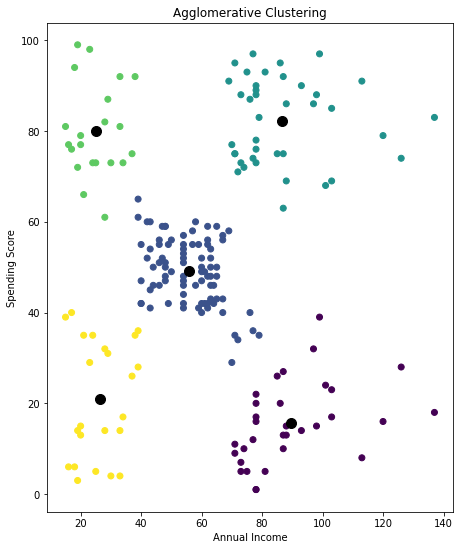

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,2)
plt.title('KMeans Algorithm')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=xpred)
plt.scatter(cent[:,0],cent[:,1], s=100, color='k')

plt.figure(figsize=(16,9))
plt.subplot(1,2,2)
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=xpred2)
plt.scatter(cent2[:,0],cent2[:,1], s=100, color='k')